In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
from gensim.models.doc2vec import Doc2Vec
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_reviews_preprocessed = pd.read_csv('/content/gdrive/MyDrive/Text Mining/Progetto_Brambatti_Fracchia_Privitera/Data/df_reviews_preprocessed.csv')


In [ ]:
df_reviews_preprocessed.shape

(145651, 8)

In [ ]:
df_reviews_preprocessed.drop(columns=['Unnamed: 0'],inplace=True)
#df_reviews_preprocessed[df_reviews_preprocessed['review_text'].isnull()]
df_reviews_preprocessed = df_reviews_preprocessed.dropna(subset=['review_text']) #no missing values
df_reviews_preprocessed.shape

(145651, 7)

In [ ]:
df_reviews_preprocessed.drop(columns=['language'],inplace=True)

# Classification
## Count Vectorizer representation

Let's one-hot encoding the label column
(0 means negative, 1 means positive)

In [ ]:
df_reviews_preprocessed['label'] = np.where(df_reviews_preprocessed['label']=='positive',1,0)
df_reviews_preprocessed.head(10)


,user_id,book_id,review_id,rating,review_text,label
0,c8d45b7d0f96c3ff949bb45100abcba2,18045891,6b3ea87e4a1c4ad1fdb0e31451f3e1bc,1,incredibly disturbing creepy ick not idea good...,0
1,c2a085c9f5d627f105dae8e0d1692ced,33151805,8e62ae0815512dfb45bd33d8dd904750,1,zero best word use describe book number stars ...,0
2,4d5935f7e37c3bcd4d3d8586f30af15d,16316,68c4b9d83013d3dd8020e79430cc9ce1,1,worst book world felt like would never end see...,0
3,47e371d09b073e720ab6b856a4eeabfd,18492486,1ec72e33fd6ccf60dac787efed6bc658,1,really wanted like book love diners love mobil...,0
4,dc862066e4b51afc0dea77def7448908,13708346,81e937215a218bc2524cadde37d13689,1,not good story recycled predictable villain ma...,0
5,4c445b4b34fc8f4ada2ddcd819a05b58,368449,5c7fbb4bcde0a004abe524c4c03d209d,1,not great reads like th grader really well con...,0
6,6096427ce218e7965671ef46f8fbaa31,10448215,e60d2669f94ca9977a5777ab96cc694c,1,book appeal fans dan brown plot relies main ch...,0
7,b7d8a8a36da8cbf54aa0dbad66f37dfe,78129,5b88e73a69479f43eb02c432aacc5e54,1,several people know read loved series thought ...,0
8,7cbe23bcf53f42276f237316ba79b6d7,12257650,7a0abc268fdaec9cebff7811bb13e4e4,1,read one gave made think comic book maybe year...,0
9,22496af88f94ec2203ce5656ee2852f0,27868408,0af66bd97cfc1f7231f2cb2f8c6b9256,1,book soo slow end not justify means know got g...,0


In [ ]:
df_reviews_preprocessed.tail(10)

,user_id,book_id,review_id,rating,review_text,label
145641,570e14c7a3e3b8d98e4c3b91f58846ce,3059921,cc9ea15d819e086afa82a1bd350334cf,5,iris johansen never fails deliver excellent no...,1
145642,1f47ae2eb3ea82f1202adc1343282f89,13513646,32b991dca7f9ea7d2a6d07451d769973,5,best work fiction read since years something l...,1
145643,5ab5a841c26a3cf7388bed00648221f2,8442457,da5089be7c137fcfc4a2bff6541c4440,5,spoiler alert amy biggest twitch come across b...,1
145644,e58ffd686d276651cde6b3e45f03c766,8701129,69636456de66d692a3ff2ab8aa4464c4,5,first lisa gardner book ever read apparently p...,1
145645,3484bb8d410e4f04c5468a72f4c0c836,21965115,5804b54236dc50f7ef5071f85fbdbb53,5,book lot fun inspired real lady ada byron mary...,1
145646,ec8f63422b35690c21e4737dc91504c7,9794605,11236005b07fed40662e94671bbf56c9,5,omg literally put book true loved longmire boo...,1
145647,909bb23ed53e2e5f7f2e4b860b32783e,7989663,1780e2ede7e52836cb811bd694157b97,5,earlier month read first couple instalments le...,1
145648,bc5e70d263d9ab06aa06000d2bcb58f8,21446984,a21ac9cf103373632c34ca2ed93d9b33,5,captivating read dark realistic entertaining n...,1
145649,f9ce85156bf9693a5ca170644677d79b,33810183,033ddd9163a469576e08cb37360f32a2,5,quick read lot fast action moment feel like th...,1
145650,d2b5e944f6cc6ab5354144b9366bc202,24622826,3734cc89f3c4ae98df1731b3381b6f11,5,susan sleeman new book web deceit book one age...,1


Let's shuffle the dataset.
Otherwise in train set we will have only negative label and in test set only positive.

In [ ]:
df_reviews_preprocessed = df_reviews_preprocessed.sample(frac=1, random_state=42)
df_reviews_preprocessed.head()

,user_id,book_id,review_id,rating,review_text,label
8999,d4b14805a20dc28c560ac2290632a7dd,140091,e85a23b6645d812aef9fdfc0b37ec66f,2,easy read nothing get excited,0
132449,ec7ea93b974e33f4f9e73565398a89e0,23197337,16a5611c2a9c58e16d22ce4fa0de1271,5,one favorite series minute start reading glued...,1
94720,cee3f5fe0189bf5d40480d09bb5dafc7,24611648,fdc64b22caa4396b1fc5b128c0544b86,4,good book twisty plot depends lot prior books ...,1
100666,b0d7e561ca59e313b728dc30a5b1862e,12837725,3738c15c3e6e3712fcf7ee05f184fbaf,4,gone girl psychological thriller marriage made...,1
10238,fa33b5ed2ffe642050f6dccf1b18683f,618860,62805b71997ed59a1ae42fddb4cb9145,2,great setting paris weak writing repetition de...,0


In [ ]:
df_reviews_preprocessed.reset_index(inplace=True)
df_reviews_preprocessed.head()

,index,user_id,book_id,review_id,rating,review_text,label
0,8999,d4b14805a20dc28c560ac2290632a7dd,140091,e85a23b6645d812aef9fdfc0b37ec66f,2,easy read nothing get excited,0
1,132449,ec7ea93b974e33f4f9e73565398a89e0,23197337,16a5611c2a9c58e16d22ce4fa0de1271,5,one favorite series minute start reading glued...,1
2,94720,cee3f5fe0189bf5d40480d09bb5dafc7,24611648,fdc64b22caa4396b1fc5b128c0544b86,4,good book twisty plot depends lot prior books ...,1
3,100666,b0d7e561ca59e313b728dc30a5b1862e,12837725,3738c15c3e6e3712fcf7ee05f184fbaf,4,gone girl psychological thriller marriage made...,1
4,10238,fa33b5ed2ffe642050f6dccf1b18683f,618860,62805b71997ed59a1ae42fddb4cb9145,2,great setting paris weak writing repetition de...,0


In [ ]:
df_reviews_preprocessed.drop(columns=['index'],inplace=True)
df_reviews_preprocessed.tail()

,user_id,book_id,review_id,rating,review_text,label
145646,3fb93f827f62bee157c8066fc0a10008,15808728,27f674b7cd3db38182c2f31b816a59c1,5,agatha christie disappeared made headlines wor...,1
145647,79d5294186565fe1343d0f49bec5cca6,16243959,18fa4fe18fb1371656bfee3b90959c34,5,really enjoyed fast paced book written first p...,1
145648,de538a40c088156ba017ff6b1fd4db97,281419,78f2e6e072c808eebe72a537cb080587,4,already guessed flowers murderer glad say righ...,1
145649,81be22d0424f1ee40ee8ca4752a285e1,1254877,e7cfc02909b203fc05df9fc5ef8dd018,5,quite bizzare case first script went per holme...,1
145650,7523c035ddc13c4d4f52eb7c058ded30,8008928,13d05205c2c2748a2f16f4df8deadfb5,5,couple laid back marijuana growers taken major...,1


In [ ]:
df_reviews_preprocessed.tail(20)

,user_id,book_id,review_id,rating,review_text,label
145631,f8269fb5583a3cec5d954f94bd5c9a92,2806057,f657283a5a8f55327cf2c7923cdd74c4,4,fine addition shardlake series grisly murders ...,1
145632,30ffcdb7c141c0df9c3427500a317d7b,23847964,c1c6532ee00332db0775c3a201d57cb8,4,shadow play iris johansen nineteenth book eve ...,1
145633,0601b630779770ec9ce5fb52e5dbff18,3281277,77afbd80af68f6243217232a6ef93c2c,2,would bet collaboration parts classic david co...,0
145634,0efb9daf11e327bf516fe4e624963301,6316381,1abbc97be3944ef6bb4502ecbdb9f0b5,4,great first book mystery least obviously fresh...,1
145635,2fb925b9ea3b60d1f3851285937e6f2b,78129,4200d6a405b693194b31308a41d8199c,4,sit back read get carried away jack one kind a...,1
145636,354ebb507bddb9c6c83e5238fd6cc2b1,27272419,7ac6199f9d36219dee73c0529ac61449,1,enjoyed previous five books quinn colson serie...,0
145637,87ae39fa18e34a6f742132a7a8e8efe3,29938372,f169f158828b1733f6e0d1abbe3c3b4a,4,holly brown family therapist ca notion book ca...,1
145638,153fd3f47047eba84223371c6bc71ad5,11360025,435a40204fe65cc0c74dacb28d0bd4ad,4,book win goodreads thank picking winner intere...,1
145639,4ddfb529ccb931a6793515e42df32a4c,25253781,24b971bab5ff64355304b52934b2eb0a,3,started rather witty cleaver ended kind pissin...,0
145640,575f0b446deaae30432621dab686b06d,6609402,e20806f95f72f9cbd0d79d6aac85b88e,3,author seems hellbent disproving bible also pr...,0


1    95706
0    49945
Name: label, dtype: int64


<Axes: ylabel='label'>

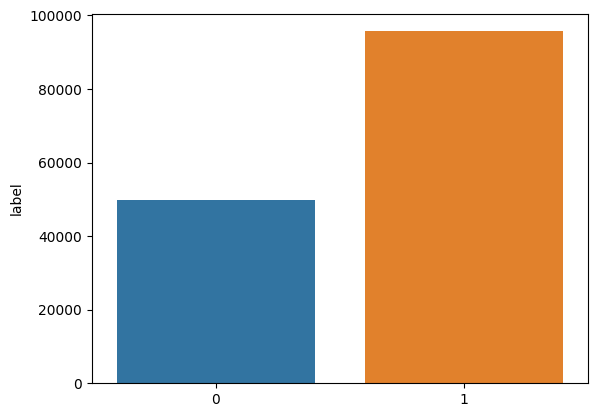

In [ ]:
#balanced dataset? --> positve are double of negative!
import seaborn as sns
x=df_reviews_preprocessed['label'].value_counts()
print(x)

sns.barplot(x=x.index, y=x)

In [ ]:
from sklearn.utils import resample

# Splitting dataset in two according to class label
df_positive = df_reviews_preprocessed[df_reviews_preprocessed['label'] == 1]
df_negative = df_reviews_preprocessed[df_reviews_preprocessed['label'] == 0]

In [ ]:
# Undersampling on positive class
df_positive_downsampled = resample(df_positive, replace=False, n_samples=len(df_negative), random_state=42)

# re building the dataframe
df_reviews_preprocessed = pd.concat([df_negative, df_positive_downsampled])

57.06519171088197
51.89870857943738


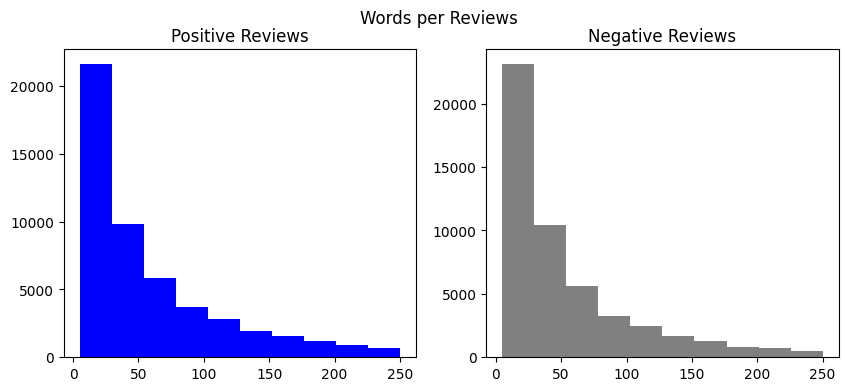

57.06519171088197
51.89870857943738


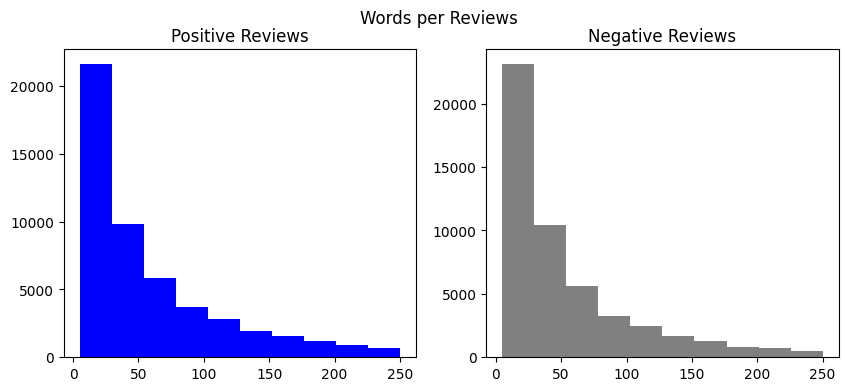

391.2307137851637
355.51336470117127


,index,user_id,book_id,review_id,rating,review_text,label,word_count,char_count
0,53457,f7d40a15ece1e08ac2bba9208c2004bf,43993,f160bd8b0b8ea72fa4713ed0b39a38be,4,novel greg iles outstanding would rank right w...,1,66,429
1,46932,755812d91c004de43078db3f955e28f9,16160797,54637f00464e081c53b1e7c7bfeadcbd,5,loved read fast finish feel sorry miserable lo...,1,12,70
2,61793,b0d0e10a1941aeb47ddbd465cbc9c11a,23441047,666e3e7a6a0d3f3f3d47a73c1bf6ca7a,5,book continues story good hope bible study gro...,1,67,439
3,58086,285cf0350d8a106c3cc7d7246778fbbc,8544,7b150e6a7c3a702092bdd4f9576d5bc6,2,convoluted plotline not usual dick francis sta...,0,7,52
4,144059,e717842613be533bbeafaeaae7cd9957,19315981,7563b0a48e11c199379028e4fc78762f,5,loved fun short story go get others series,1,8,43


In [ ]:
# WORD-COUNT on average
df_reviews_preprocessed['word_count'] = df_reviews_preprocessed['review_text'].apply(lambda x: len(str(x).split()))
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count'].mean()) #Positive reviews
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count'].mean()) #Negative reviews

# PLOTTING WORD-COUNT: majority of data are short
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count']
ax1.hist(train_words,color='blue')
ax1.set_title('Positive Reviews')
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count']
ax2.hist(train_words,color='gray')
ax2.set_title('Negative Reviews')
fig.suptitle('Words per Reviews')
plt.show()

#By the fact that the majority of reviews are short, let's filter out too long reviews in order to avoid problem with vectorization and word embedding.
#We will keep only reviews that have at maxium 250 words.


df_reviews_preprocessed= df_reviews_preprocessed[df_reviews_preprocessed['word_count']<=250]
df_reviews_preprocessed.shape

print(df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count'].mean()) #Positive reviews
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count'].mean()) #Negative reviews

# PLOTTING WORD-COUNT: majority of data are short
import matplotlib.pyplot as plt
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,4))
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['word_count']
ax1.hist(train_words,color='blue')
ax1.set_title('Positive Reviews')
train_words=df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['word_count']
ax2.hist(train_words,color='gray')
ax2.set_title('Negative Reviews')
fig.suptitle('Words per Reviews')
plt.show()

# CHARACTER-COUNT
df_reviews_preprocessed['char_count'] = df_reviews_preprocessed['review_text'].apply(lambda x: len(str(x)))
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==1]['char_count'].mean()) #Positive Reviews
print(df_reviews_preprocessed[df_reviews_preprocessed['label']==0]['char_count'].mean()) #Negative Reviews

#Let's shuffle the dataset
#Otherwise in train set we will have only negative label and in test set only positive.

df_reviews_preprocessed = df_reviews_preprocessed.sample(frac=1, random_state=42)
df_reviews_preprocessed.head()

df_reviews_preprocessed.reset_index(inplace=True)
df_reviews_preprocessed.head()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score, recall_score
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

X, y = df_reviews_preprocessed['review_text'], df_reviews_preprocessed['label']


X_train, X_test, y_train, y_test = train_test_split(df_reviews_preprocessed['review_text'],
                                                    df_reviews_preprocessed['label'],
                                                    test_size=0.2,
                                                    random_state=0)

In [ ]:

train_data_combined = np.column_stack((X_train, y_train))
#print(train_data_combined)

train_data_combined_df = pd.DataFrame(train_data_combined, columns=['review_text', 'label'])
#print(train_data_combined_df)

In [ ]:
X_train
X_test

50249    first saw subject novel legendary library gold...
82111    light entertaining read interesting read story...
17837    received book netgalley exchange honest review...
86317    enjoyable read albeit little implausible well ...
89984     stars could much better guess nothing path da...
                               ...                        
65627    jackie blue g davis brings back another humor ...
98684              think read many starting figure tricks 
19495    murder past due one favorite types book cat mi...
98192    seven years since olivia barnes baby prominent...
9624     stay night finish type book starts bang imposs...
Name: review_text, Length: 19978, dtype: object

In [ ]:
y

0        1
1        1
2        1
3        0
4        1
        ..
99885    0
99886    1
99887    1
99888    0
99889    0
Name: label, Length: 99890, dtype: int64

In [ ]:
# percentage positive reviews

positive_percent = len(df_reviews_preprocessed[df_reviews_preprocessed['label'] == 1]) / len(df_reviews_preprocessed) * 100

print(positive_percent)


50.0


In [ ]:
positive_train = len(train_data_combined_df[train_data_combined_df['label'] == 1]) / len(train_data_combined_df) * 100

print(positive_train)

50.05756331965162


In [ ]:
df_reviews_preprocessed[df_reviews_preprocessed['review_text'].str.strip() == '']

df_reviews_preprocessed[df_reviews_preprocessed['review_text'].isnull()]

,index,user_id,book_id,review_id,rating,review_text,label,word_count,char_count


In [ ]:
X_train.shape #shape of the dataset not vectorized

(79912,)

## TFIDF Representation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


# Convert numpy arrays to lists
#X_train_list = X_train.tolist()
#X_test_list = X_test.tolist()

# Creating TF-IDF Vectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Training and evaluation of model

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report

# Logistic Regression

lr_model = LogisticRegression()
lr_accuracy, lr_report = train_and_evaluate_model(lr_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print("Logistic Regression Accuracy:", lr_accuracy)
print("Logistic Regression Classification Report:\n", lr_report)

# Decision Tree

dt_model = DecisionTreeClassifier()
dt_accuracy, dt_report = train_and_evaluate_model(dt_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print("\nDecision Tree Accuracy:", dt_accuracy)
print("Decision Tree Classification Report:\n", dt_report)

# Random Forest

rf_model = RandomForestClassifier()
rf_accuracy, rf_report = train_and_evaluate_model(rf_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print("\nRandom Forest Accuracy:", rf_accuracy)
print("Random Forest Classification Report:\n", rf_report)

# XGBoost

xgb_model = XGBClassifier()
xgb_accuracy, xgb_report = train_and_evaluate_model(xgb_model, X_train_tfidf, y_train, X_test_tfidf, y_test)
print("\nXGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_report)

Logistic Regression Accuracy: 0.7551806987686455
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.75      0.75     10035
           1       0.75      0.76      0.76      9943

    accuracy                           0.76     19978
   macro avg       0.76      0.76      0.76     19978
weighted avg       0.76      0.76      0.76     19978


Decision Tree Accuracy: 0.626238862749024
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.63      0.63     10035
           1       0.63      0.62      0.62      9943

    accuracy                           0.63     19978
   macro avg       0.63      0.63      0.63     19978
weighted avg       0.63      0.63      0.63     19978


Random Forest Accuracy: 0.7306537190910001
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.74  

Logistic Regression

The accuracy of approximately 0.76 indicates that the Logistic Regression model has achieved good accuracy in classifying reviews. The balanced accuracy and recall for both classes suggest that the model is able to handle both categories well.

Decision Tree

With an accuracy of about 0.63, the Decision Tree shows a lower performance than the Logistic Regression. (The lower accuracy for class 0 indicates that the model has difficulty correctly identifying negative reviews).

Random Forest

Despite the good overall accuracy of about 0.73, the lower recall for class 1 suggests that the model has more difficulty identifying all positive reviews. However, the balanced accuracy indicates a good handling of both classes.

XGBoost

With an accuracy of about 0.73, the XGBoost model shows a similar performance to the Logistic Regression. The lower recall for class 1 indicates that the model has a slight tendency to lose some positive reviews.

In general, all models seem to be quite effective in classifying reviews, with Logistic Regression showing the highest performance in terms of accuracy.

## Word2Vec Embedding

In [ ]:
import pandas as pd
import nltk
import string
import matplotlib.pyplot as plt
import gensim
import gensim.downloader as api
from nltk.corpus import stopwords
from nltk import word_tokenize
from gensim.models import Word2Vec as w2v
from sklearn.manifold import TSNE

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import scale
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.base import TransformerMixin
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
sentences = [sentence.split() for sentence in X_train]

w2v_model = Word2Vec(sentences, window=5, min_count=5, workers=4)

In [ ]:
def vectorize(sentence):
    words = sentence.split()
    words_vecs = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    if len(words_vecs) == 0:
        return np.zeros(100)
    words_vecs = np.array(words_vecs)
    return words_vecs.mean(axis=0)

X_train = np.array([vectorize(sentence) for sentence in X_train])

X_test = np.array([vectorize(sentence) for sentence in X_test])

In [ ]:
def plot_roc(clf, X_test, y_test):
    y_pred = clf.predict(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('FPR')
    plt.ylabel('TPR')

Logistic Regression Model for vectorization

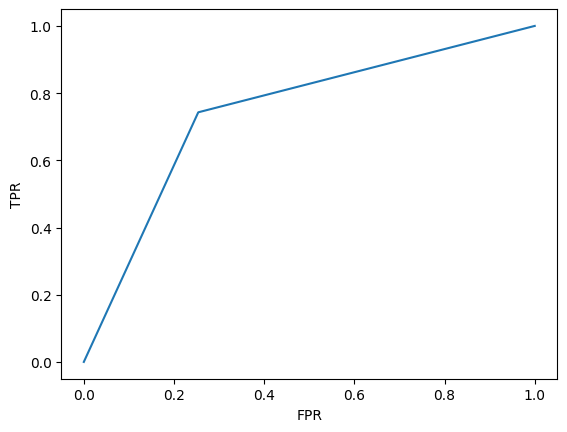

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

plot_roc(clf, X_test, y_test)

In [ ]:
y_pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label=1))
print('Recall:', recall_score(y_test, y_pred, pos_label=1))
print('F1 score:', f1_score(y_test, y_pred, pos_label=1))

Accuracy: 0.7445690259285214
Precision: 0.7436078115562714
Recall: 0.742934727949311
F1 score: 0.7432711173718368


Knn Classifier

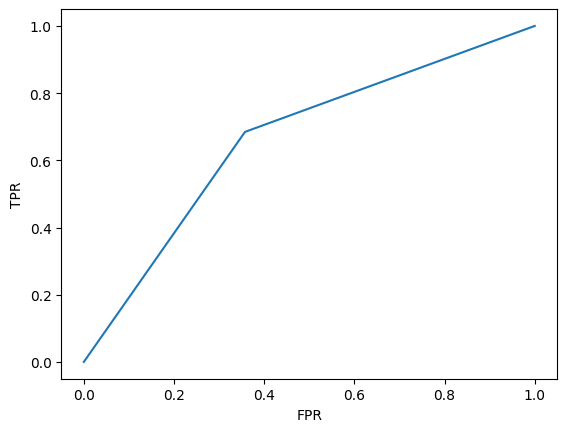

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)

plot_roc(knn, X_test, y_test)

In [ ]:
y_pred = knn.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, pos_label=1))
print('Recall:', recall_score(y_test, y_pred, pos_label=1))
print('F1 score:', f1_score(y_test, y_pred, pos_label=1))

Accuracy: 0.6634798278105917
Precision: 0.6548970559938426
Recall: 0.6846022327265413
F1 score: 0.6694202684761764


Decision Tree Classifier

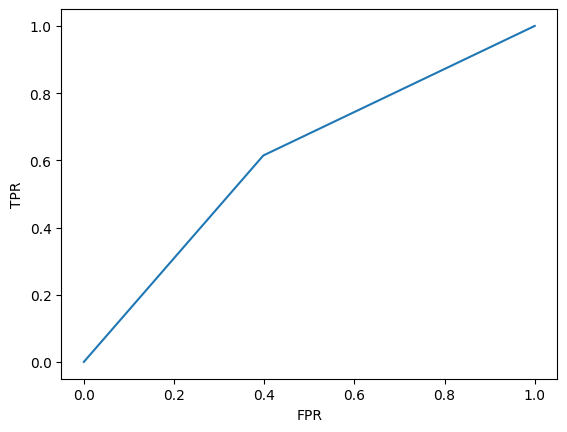

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Decision Tree Classifier

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

plot_roc(dt_classifier, X_test, y_test)

In [ ]:
# Making predictions

y_test_pred = dt_classifier.predict(X_test)

# Print scores

print('\nTest Accuracy:', accuracy_score(y_test, y_test_pred))
print('Test Precision:', precision_score(y_test, y_test_pred, pos_label=1))
print('Test Recall:', recall_score(y_test, y_test_pred, pos_label=1))
print('Test F1 score:', f1_score(y_test, y_test_pred, pos_label=1))



Test Accuracy: 0.6081189308239063
Test Precision: 0.604612034837688
Test Recall: 0.6144020919239667
Test F1 score: 0.6094677507856539


Random Forest Classifier

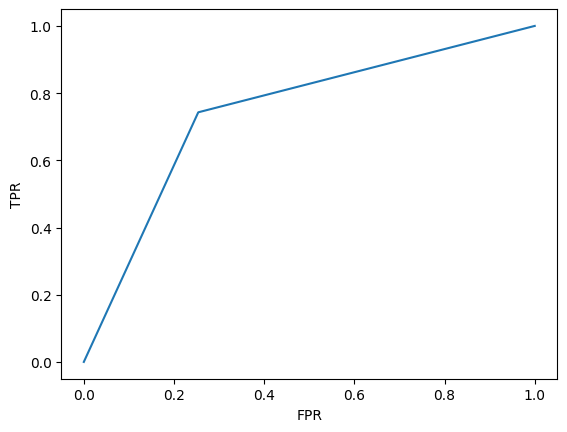

In [ ]:
rf_classifier = RandomForestClassifier().fit(X_train, y_train)
plot_roc(clf, X_test, y_test)

In [ ]:
y_test_pred = rf_classifier.predict(X_test)

# Print scores

print('\nTest Accuracy:', accuracy_score(y_test, y_test_pred))
print('Test Precision:', precision_score(y_test, y_test_pred, pos_label=1))
print('Test Recall:', recall_score(y_test, y_test_pred, pos_label=1))
print('Test F1 score:', f1_score(y_test, y_test_pred, pos_label=1))


Test Accuracy: 0.7236064932524936
Test Precision: 0.7264876000316932
Test Recall: 0.7172807635140421
Test F1 score: 0.7218548260116519
